# zipcode_dummies+price_transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [71]:
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\CAPSTONE\jupyter files\final_data_used.csv")

In [25]:
data.head()

,Unnamed: 0,host_id,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,0,2164,0,1,13355,52.54425,13.39749,Apartment,Private room,1,...,82.0,9.0,8.0,9.0,9.0,9.0,8.0,0,moderate,13
1,1,3718,0,1,10405,52.53500,13.41758,Apartment,Entire home/apt,4,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,19
2,2,4108,0,0,10777,52.49885,13.34906,Apartment,Private room,1,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,24
3,3,16149,0,1,10243,52.51171,13.45477,Loft,Entire home/apt,2,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,26
4,4,17391,1,1,10437,52.54316,13.41509,Apartment,Private room,2,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,15


In [12]:
data.columns

Index(['Unnamed: 0', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [72]:
data.drop(['Unnamed: 0', 'host_id', 'latitude', 'longitude', 'property_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','review_scores_rating', 'review_scores_accuracy','review_scores_checkin',
       'review_scores_communication', 'review_scores_location','instant_bookable', 'cancellation_policy'],axis=1,inplace=True)

In [73]:
data=data[data['zipcode'].notna()]

In [74]:
data['price']=(np.log(np.log(data['price'])))

In [75]:
data['cleaning_fee']=(np.log(data['cleaning_fee']+1))

In [76]:
data1=pd.get_dummies(data,columns=['zipcode', 'room_type'],drop_first=True)

In [77]:
y=data1['price']
X=data1.drop('price',axis=1)

In [34]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     104.6
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:59:48   Log-Likelihood:                 18096.
No. Observations:               24020   AIC:                        -3.575e+04
Df Residuals:                   23799   BIC:                        -3.396e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

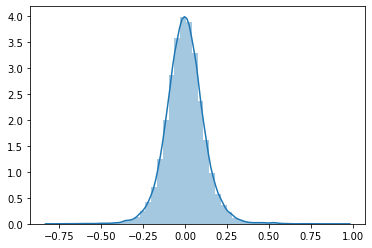

In [35]:
residuals=result.resid
sns.distplot(residuals)
plt.show()

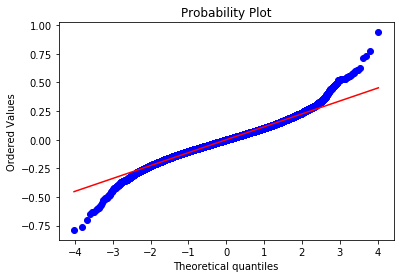

In [36]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
host_is_superhost,1.430467
host_identity_verified,1.597102
cleaning_fee,9.361479
guests_included,4.216796
extra_people,1.805389
review_scores_cleanliness,112.968984
review_scores_value,163.306831
No_of_amenities,5.662168
zipcode_10115,5.905768
zipcode_10115\n10115,1.007820


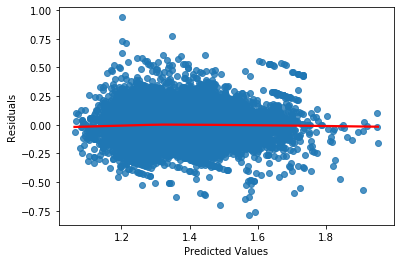

In [38]:
residuals=result.resid
y_pred=result.predict(xc)
sns.regplot(x=y_pred,y=residuals,line_kws={'color':'r'},lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Ridge

In [40]:
n_alphas=1000
alphas=np.logspace(-12,12)
ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

5.428675439323859

In [ ]:
ridge=Ridge(alpha=5.428675439323859)
ridge.fit(X,y)
ridge.coef_
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

## Lasso

In [45]:
n_alphas=1000
alphas=np.linspace(0.1,5,n_alphas)
lasso_cv=LassoCV(alphas=alphas,cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.1049049 , 0.10980981, 0.11471471, 0.11961962,
       0.12452452, 0.12942943, 0.13433433, 0.13923924, 0.14414414,
       0.14904905, 0.15395395, 0.15885886, 0.16376376, 0.16866867,
       0.17357357, 0.17847848, 0.18338338, 0.18828829, 0.19319319,
       0.1980981 , 0.203003  , 0.20790791, 0.21281281, 0.21771772,
       0.22262262, 0.22752753, 0.23243243, 0.23733734, 0.24224224,
       0.2471471...
       4.93133133, 4.93623624, 4.94114114, 4.94604605, 4.95095095,
       4.95585586, 4.96076076, 4.96566567, 4.97057057, 4.97547548,
       4.98038038, 4.98528529, 4.99019019, 4.9950951 , 5.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [46]:
lasso_cv.alpha_

0.1

In [ ]:
lasso=Lasso(alpha=0.001)
lasso.fit(X,y)
lasso.coef_
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

## ElasticNet

In [48]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
n_alphas=1000
alphas=np.logspace(-10,10,n_alphas)
elastic_cv=ElasticNetCV(alphas=alphas,cv=3)
elastic_cv.fit(X,y)
elastic_cv.alpha_

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08482060223892063, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2684448549201761, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20434576837382679, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not 

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.298713763987436, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.43222875875091, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.459323147154038, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not con

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.79910650185485, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.94602506266443, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.65757456779306, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conve

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.32113636272089, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.40671356012322, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.48679403577191, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conve

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.40997558615196, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.44724162350995, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.48192984344624, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conve

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.91335377142323, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.91805136667057, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.92248154747398, tolerance: 0.042289200850373784
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conve

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08274648845610955, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5407480661853583, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6629724810622122, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conv

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.496889166701905, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.7634962783263, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.668149976325836, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converg

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.41161194185943, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.12046632683428, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.74948286686006, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.95737636738497, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.03804946084406, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.11349124084792, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.12154078716647, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.13421897955533, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.14625957142759, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.32309715118015, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.32598462954716, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.32873760436554, tolerance: 0.03982272452823594
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

7.689283720758305e-05

In [ ]:
enet=ElasticNet(alpha=0.0001)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

In [49]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
enet=ElasticNet(alpha=7.689283720758305e-05)
lasso=Lasso(alpha=0.1)
ridge=Ridge(alpha=5.428675439323859)
models=[]

In [50]:
models.append(('Linear',LR))
models.append(('Ridge',ridge))
models.append(('Lasso',lasso))
models.append(('ElasticNet',enet))

In [51]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -66332630699289648.000000 (37421310302059391116937729864105984.000000))
Ridge: 0.480887 (0.000625))
Lasso: 0.089808 (0.000102))
ElasticNet: 0.479637 (0.000643))


In [52]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -1619227127215135.500000 (22122018484033182379159687528448.000000))
Ridge: -0.013243 (0.000000))
Lasso: -0.023228 (0.000000))
ElasticNet: -0.013276 (0.000000))


In [53]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -321190.137043 (634392398359.223145))
Ridge: -0.086479 (0.000003))
Lasso: -0.119992 (0.000003))
ElasticNet: -0.086645 (0.000003))


### REgressors

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False

In [55]:
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         '

In [56]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.42387521235095066
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [ ]:
dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='neg_mean_absolute_error')
GS.fit(X,y)

print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

## KNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [58]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.3408428389516352
{'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')


## RF

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(rf,param,cv=3,scoring='r2')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.45047203626964294
{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


## Bagging- r2

In [60]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")


alg=['DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: 0.494304 (0.000451))

KNN: 0.423120 (0.000521))

LR: -15881163034907418.000000 (2204441929433467765869875996655616.000000))



## Adaboost

In [61]:
from sklearn.ensemble import AdaBoostRegressor
alg=['RF','DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i =='RF':
        results=[]
        cart = RandomForestRegressor(max_depth= 9, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

RF: 0.477852 (0.000242))

DT: 0.462884 (0.000231))



KeyboardInterrupt: 

### SVR

In [80]:
from sklearn.svm import SVR

In [ ]:
support=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
linea=SVR(kernel='linear', C=100, gamma='auto')
poly=SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [ ]:
models=[]
models.append(('rbf',support))
models.append(('linear',linea))
models.append(('poly',poly))

from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))